## Load, enrich, augment and clean the data

In [1]:
# dataset is taken from Kaggle and downloaded from here:
# https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction
# license is CC0: Public Domain - can copy, modify, distribute and perform the work, 
# even for commercial purposes, all without asking permission.

import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.4f}'.format) # to kill scientific notation..


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
df.head() # look of the original dataset


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0000,64,3,4.9077,52.3562
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0000,60,3,4.8505,52.3486
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0000,109,4,4.9448,52.3438
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0000,128,6,4.7899,52.3437
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0000,138,5,4.9025,52.4105


In [2]:
# STEP 1 - make columns look good:
df.columns = df.columns.str.lower()

# We will use only 4 columns for the start
df['pc4'] = df.zip.str.split().str[0]
used_cols = ['pc4', 'area', 'room', 'price']
df = df[used_cols]

df.head(1)

,pc4,area,room,price
0,1091,64,3,685000.0000


In [3]:
df.describe()

,area,room,price
count,924.0000,924.0000,920.0000
mean,95.9524,3.5714,622065.4196
std,57.4474,1.5923,538994.1754
min,21.0000,1.0000,175000.0000
25%,60.7500,3.0000,350000.0000
50%,83.0000,3.0000,467000.0000
75%,113.0000,4.0000,700000.0000
max,623.0000,14.0000,5950000.0000


In [4]:
# STEP 2 -feature engineering skipped, see appendix

# STEP 3 - skipped mappings and focus only on 3 features - pc4, area and rooms
df.pc4.nunique() # 70 - much better for grouping


70

<Axes: xlabel='price', ylabel='Count'>

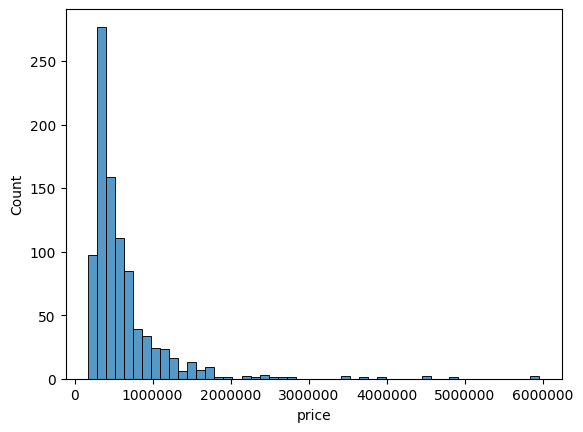

In [5]:
# Look at the price variable. Does it have a long tail - YES!!

plt.ticklabel_format(style='plain')
sns.histplot(df.price, bins=50) 

In [6]:
# missing values and making 
df['area'] = df['area'].astype('int64')
df['room'] = df['room'].astype('int64')

# missing values - count and fill missing values with zeros.
df.isna().sum()

pc4      0
area     0
room     0
price    4
dtype: int64

In [7]:
# As we have only 4 rows with missing price out of 924 we can delete it
df = df.dropna(subset=['price'])
df['price'] = df['price'].astype('int64')
df.describe()


,area,room,price
count,920.0000,920.0000,920.0000
mean,95.6076,3.5641,622065.4196
std,56.8497,1.5710,538994.1754
min,21.0000,1.0000,175000.0000
25%,60.0000,3.0000,350000.0000
50%,83.0000,3.0000,467000.0000
75%,113.0000,4.0000,700000.0000
max,623.0000,14.0000,5950000.0000


## Appendix

In [8]:
# df.zip.nunique() # 834 - too many for grouping...

In [9]:
# df.address.nunique() # 919 - too many as well...

In [10]:
# idea - we need to extract city districts (wijk in Dutch) based on the zip/street address
# collect a sentiment score for each district in range 1-10 using LLM - good or bad for living
# and add it as columns to our dataset - district and sentiment - as realtors often say - location, location, location...

# I decided to drop GPS lat long columns - not to mess up with Google maps API for simplicity
# and used Amsterdam district names from here:
# https://data.europa.eu/data/datasets/22433-postcode-buurt-wijk?locale=da

# idea 2 - in Amsterdam city district - wijk consists of subdistricts - buurt
# which consists of PC4 post codes (first 4 digits of zip column in our dataset)
# I will drop the street address for now and map buurt and wijk from downloaded CSV to PC4

In [11]:
# small explanation how Dutch postal addresses are organised
# The PC4 (first four digits of zip code) identifies a broad area within a city — 
# this can be mapped to neighbourhood or district statistically.
# The PC6 (full 6 characters of zip code, including letters) often maps to one side 
# of a street, or even a cluster of house numbers.
# The letter pair (e.g., CR in zip = '1091 CR') is simply a unique subdivision to make post sorting precise.

# Example:
# full zip  = 1091 CR
# street address: Blasiusstraat 8 2, Amsterdam
# Neighbourhood (Buurt): Weesperzijde
# District (Wijk): Oud-Oost
# Part of the city (Stadsdeel): Amsterdam-Oost

# so the naming hierachy is postcode → buurt → wijk


# prepare our df zip code col for mapping
# df['pc4'] = df.zip.str.split().str[0]
# df['PC6'] = df.zip.str.replace(' ', '')
# df.head(1)

In [12]:
# df.pc4.nunique() # 70 - much better for grouping

In [13]:
# STEP 2 - download district and area codes - buurt and wijk - from national statistics bureau:
# https://www.cbs.nl/nl-nl/maatwerk/2023/35/buurt-wijk-en-gemeente-2023-voor-postcode-huisnummer

# mapping = pd.read_csv('pc6hnr20230801_gwb.csv', delimiter=';')
# mapping.head(1)

In [14]:
# merge dataframes

# df = df.merge(mapping, on='PC6')
# df